In [2]:
import numpy as np
from lxml import etree
import pandas
import os

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import pylab
from pylab import *

import matplotlib.image as mpimg
import matplotlib.cm as cm

In [3]:
def randRGB(r,g,b):
    h = '#'
    for j in [r,g,b]:
        h += hex( min(255,int(256*j)))[2:].zfill(2)
    return(h)

In [4]:
def cmmaker(xlo, xhi, colorlo, colorhi):
    def cm(x):
        h = (x-xlo)/(xhi-xlo)
        ncolorlo = np.array(colorlo)
        ncolorhi = np.array(colorhi)
        color = ncolorlo*(1-h) + ncolorhi*h
        return randRGB(*color)
    return cm

cm1 = cmmaker(0, 15, np.array([1,1,0]), np.array([0,1,1]))
cm1(10)

'#55ffaa'

In [13]:
a = np.array([1,0,1])
a1 = a
a1[0] = a[0] +1
a1

array([2, 0, 1])

In [5]:
def cmmaker2(xlo, xhi, ylo, yhi, xycolorlo, xycolorhi, xcolorhi, ycolorhi):
    def cm(x,y):
        h1 = (x-xlo)/(xhi-xlo)
        h2 = (y-ylo)/(yhi-ylo)
        nlo = np.array(xycolorlo)
        nhi = np.array(xycolorhi)
        nxh = np.array(xcolorhi)
        nyh = np.array(ycolorhi)
        color = np.zeros(3)
        color[0] = nlo[0]*(1-h2) + nyh[0]*h2
        color[1] = nlo[1]*(1-h1) + nxh[1]*h1
        color[2] = nhi[2]
        return randRGB(*color)
    return cm

In [6]:
lo = np.array([1,1,1])
hi = np.array([0,0,1])
xhi = np.array([1,0,1])
yhi = np.array([0,1,1])

cm2d = cmmaker2(100,200,1,2,lo,hi,xhi,yhi)
#cm0(0)

In [26]:
cm2d(200,2)

'#0000ff'

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import pylab
from pylab import *

import matplotlib.image as mpimg
#plt.plot( 2,1,'.',color=cm1(10))
#plt.plot( 2,1,'.',color=cm1(10))
#plt.plot( 200,2,'.',color=cm2d(200,2))

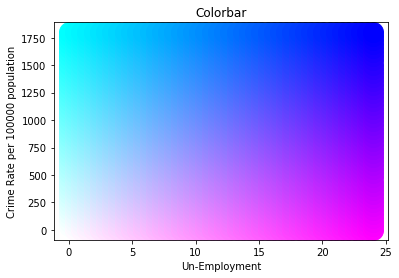

In [8]:
lo = np.array([1,1,1])
hi = np.array([0,0,1])
xhi = np.array([1,0,1])
yhi = np.array([0,1,1])

cm2d = cmmaker2(0,24,0,1800,lo,hi,xhi,yhi)

xa = np.linspace(0,24,50)
ya = np.linspace(0,1800,50)
for x in xa:
    for y in ya:
            fig = plt.plot( x , y, color=cm2d(x,y), marker="o",  markersize=20 )
plt.xlabel('Un-Employment')
plt.ylabel('Crime Rate per 100000 population')
plt.title('Colorbar')
plt.savefig('2Dcolorbar.png', bbox_inches='tight')

In [90]:
##----------- Please Use Ubuntu and make sure INKSCAPE is installed ---------##
##-----------------Else make change in OS command rispectively---------------##
url='https://www.bls.gov/lau/laucnty{}.xlsx'
name = 'U{}.svg'
com = 'inkscape -f U{}.svg -e U{}.png -d 400 -b WHITE'
for p in range(8,17):
    #if p==9: break
    m = str(p).zfill(2)
    URL = url.format(m)
    u1 = pandas.read_excel(URL,skiprows=6,skipfooter=3,header=None)
    u1.columns = [0,1,2,3,4,5,6,7,8,'Urate']
    u1['FIPS'] = u1[0].map(lambda x: str(x)[2:7])
    u1.index = u1['FIPS']
    u1 = u1.drop(columns=u1.columns[:9])
    u1 = u1.drop(columns=u1.columns[1])
    
    cm1 = cmmaker(u1['Urate'].min(), u1['Urate'].max(), np.array([0.4,0.73,1]), np.array([0.43,0,0]))
    
    with open('USA.svg') as f:
            map = etree.fromstring(f.read().encode('utf-8'))
    item = map[0] # second g is State lines and separators

    for i,path in enumerate(item):
            if 'FIPS' in path.attrib['id']:
                fs = path.attrib['id'][5:]
                try:
                    UR = u1.loc[fs].values[0]
                    path.attrib['fill'] = cm1(UR)
                    path.attrib['fill-opacity'] = "0.8"
                except:
                    pass
            #if i>5: break
    
    h = '235'
    tick = 10
    w = (u1['Urate'].max()-u1['Urate'].min())/(tick+1)
    s= etree.Element('style')
    s.text = '.small { font: bold 5px sans-serif; }'
    map.append(s)
    for j in range(tick):
        tmp = u1['Urate'].min()+(j*w)
        tmp2 = u1['Urate'].min()+((j+1)*w)
        fill2 = (tmp+tmp2)/2
        tmp3 = str("{0:0.1f}".format(tmp)) + '% to ' + str("{0:0.1f}".format(int(tmp2)-0.1)) + '%'
        if j==tick:
            tmp3 = str("{0:0.1f}".format(tmp)) + '% to ' + str("{0:0.1f}".format(u1['Urate'].max())) + '%'
        r = etree.Element('rect')
        t = etree.Element('text')
        r.attrib #dict of attrib
        t.attrib
        
        r.attrib['x'] = '485'
        r.attrib['y'] = str(int(h) +5)
        r.attrib['width'] = '20'
        r.attrib['height'] = '5'
        r.attrib['fill'] = cm1(fill2)
        r.attrib['fill-opacity'] = "0.8"
        map.append(r)
        
        t.attrib['x'] = '507'
        t.attrib['y'] = str(int(h) +10)
        t.attrib['class'] = 'small'
        t.text = tmp3
        map.append(t)
        h = t.attrib['y']
    
    n = name.format(m)
    with open(n,'w') as f:
            f.write(etree.tostring(map).decode('utf-8'))
    coma = com.format(m,m)
    os.system(coma)

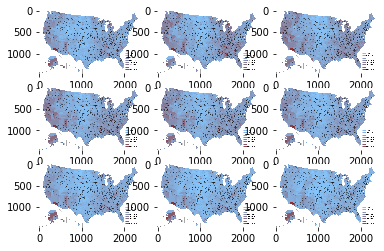

In [110]:
img1 = 'U{}.png'
for im in range(9):
    m = str(im+8).zfill(2)
    img=mpimg.imread(img1.format(m))
    grid = '3' + '3' + str(im+1)
    plt.subplot(grid)
    plt.box(False)
    #figsize = (width, height)
    #fig = plt.figure(figsize=figsize)
    #ax = plt.axes([0,0,1,1], frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    imgplot = plt.imshow(img)

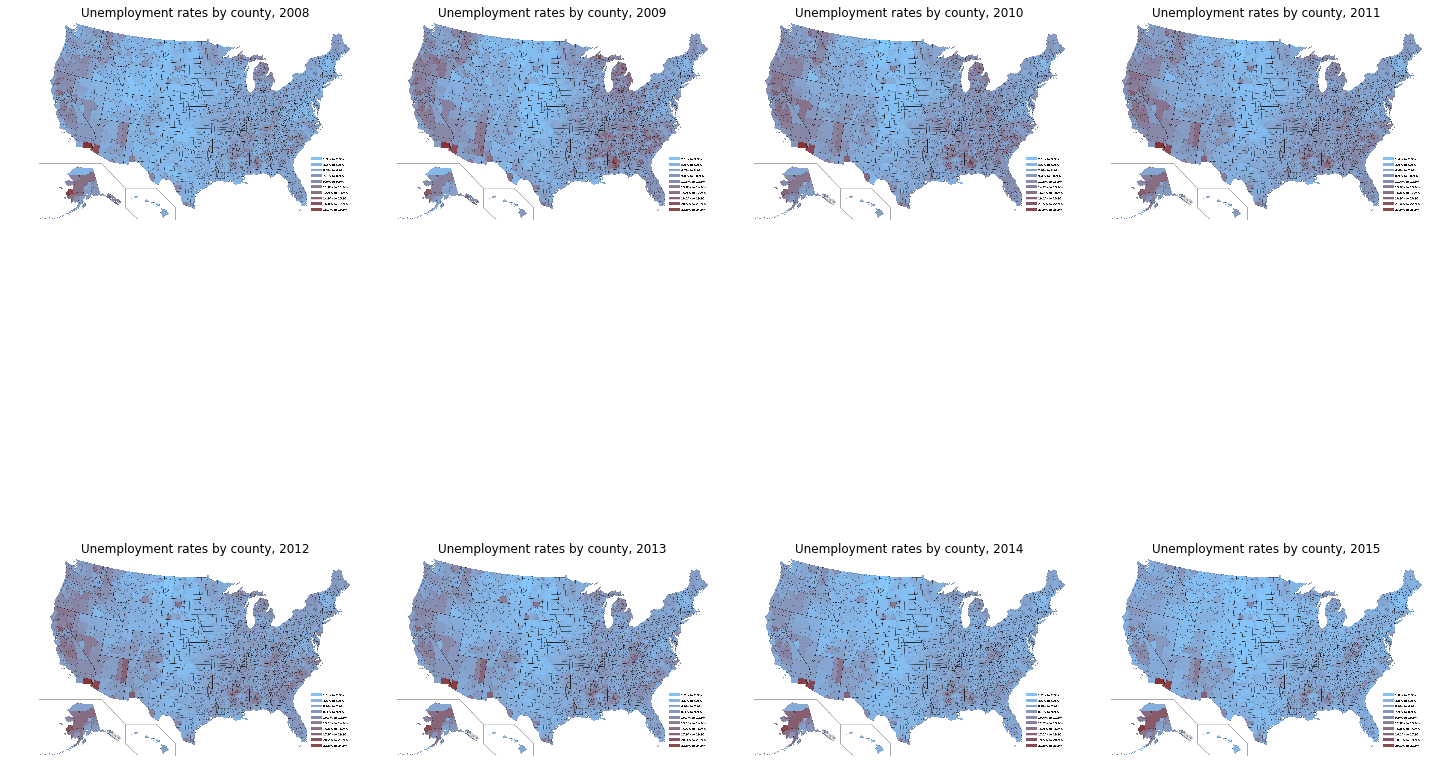

In [24]:
img1 = 'U{}.png'
Tit = 'Unemployment rates by county, 20{}'
f, axarr = plt.subplots(2, 4,figsize=(20,20))
                        #, constrained_layout=True)
f.subplots_adjust(hspace = .001)
ti = 0
for im in range(2):
    for jm in range(4):
        m = str(ti+8).zfill(2)
        tit = Tit.format(m)
        img=mpimg.imread(img1.format(m))
        axarr[im,jm].imshow(img)
        axarr[im,jm].set_title(tit)
        #plt.box(on=None)
        axarr[im,jm].axis('off')
        ti += 1
f.tight_layout()

In [117]:
mycons= {'FIPS_ST':lambda x:str(x).zfill(2), 'FIPS_CTY':lambda x:str(x).zfill(3)}
u2 = pandas.read_csv('crime_data.csv',converters=mycons)
u2['FIPS'] = u2['FIPS_ST'] + u2['FIPS_CTY']
u2.index = u2['FIPS']
u2 = u2.drop(columns=u2.columns[2:])
   
lo = np.array([1,1,1])
hi = np.array([0,0,1])
xhi = np.array([1,0,1])
yhi = np.array([0,1,1])
cm2d = cmmaker2(u1['Urate'].min(),u1['Urate'].max(),u2['crime_rate_per_100000'].min(),u2['crime_rate_per_100000'].max(),lo,hi,xhi,yhi)
    
with open('USA.svg') as f:
    map = etree.fromstring(f.read().encode('utf-8'))
item = map[0] # second g is State lines and separators

for i,path in enumerate(item):
    if 'FIPS' in path.attrib['id']:
        fs = path.attrib['id'][5:]
        try:
            UR1 = u1.loc[fs].values[0]
            UR2 = u2.loc[fs].values[1]
            path.attrib['fill'] = cm2d(UR1,UR2)
            path.attrib['fill-opacity'] = "1"
        except:
            pass
            #if i>5: break
    
with open('UvsC.svg','w') as f:
    f.write(etree.tostring(map).decode('utf-8'))
os.system('inkscape -f UvsC.svg -e UvsC.png -d 400 -b WHITE')

0

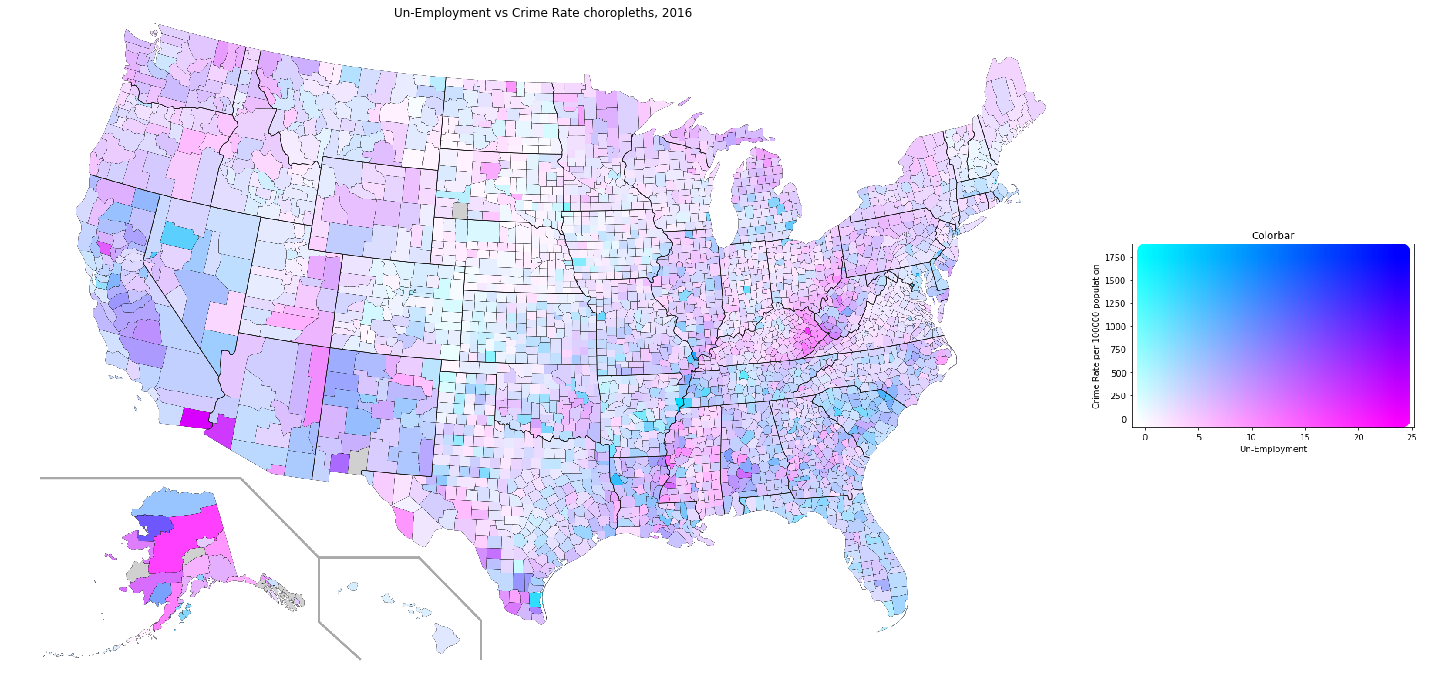

In [123]:
f, axarr = plt.subplots(1, 2, figsize=(20,20), gridspec_kw = {'width_ratios':[3, 1]})
img=mpimg.imread('UvsC.png')
axarr[0].imshow(img, cmap = cm.Greys_r)
axarr[0].set_title('Un-Employment vs Crime Rate choropleths, 2016')
axarr[0].axis('off')

img=mpimg.imread('2Dcolorbar.png')
axarr[1].imshow(img, cmap = cm.Greys_r)
axarr[1].axis('off')
f.tight_layout()
